In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\Banesta\Downloads\Prec\employee_retirement_data.csv")
data

,Employee_ID,Age,Income,Years_of_Service,Financial_Obligations,Withdrawals_Past_Year,Feedback
0,1,25,30000,1,1000,1,I like the flexibility of the system.
1,2,32,45000,5,2000,0,It's difficult to save enough for retirement.
2,3,45,60000,10,3000,2,The system is too complex for me.
3,4,29,32000,3,1500,0,I find it helpful for managing emergencies.
4,5,38,55000,8,2500,1,More education on long-term savings would help.
5,6,50,70000,20,4000,1,The withdrawal limits are too strict.
6,7,23,28000,0,800,1,I'm concerned about my savings depleting.
7,8,41,48000,15,2200,0,I appreciate having access when needed.
8,9,36,52000,12,1800,0,The locked pot gives me peace of mind.
9,10,48,75000,25,3500,2,I think the system is beneficial overall.


In [38]:
print(data.isnull().sum())

Employee_ID              0
Age                      0
Income                   0
Years_of_Service         0
Financial_Obligations    0
Withdrawals_Past_Year    0
Feedback                 0
dtype: int64


In [39]:
print(data.columns)

Index(['Employee_ID', 'Age', 'Income', 'Years_of_Service',
       'Financial_Obligations', 'Withdrawals_Past_Year', 'Feedback'],
      dtype='object')


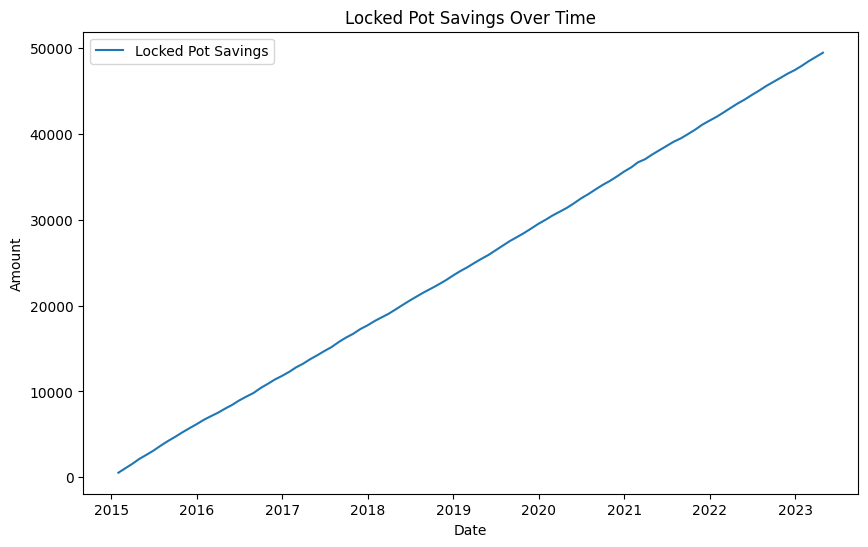

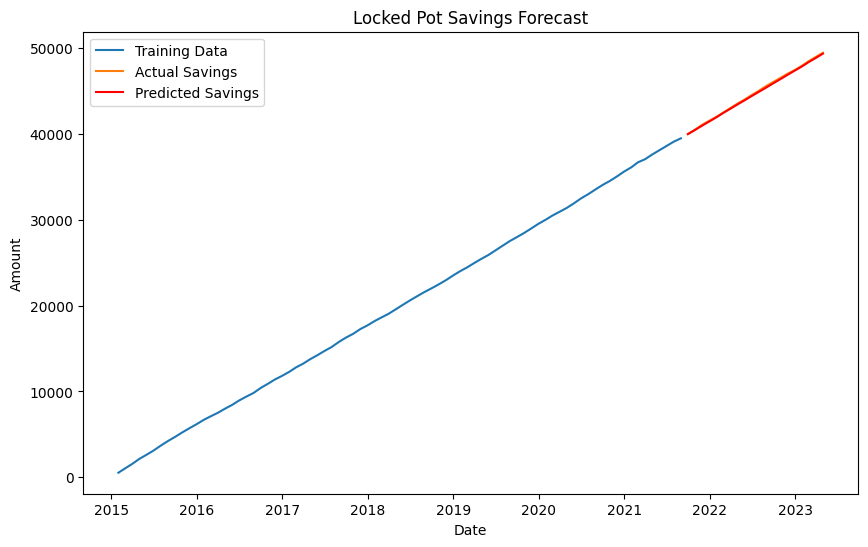

                               SARIMAX Results                                
Dep. Variable:     Locked_Pot_Savings   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -422.293
Date:                Thu, 17 Oct 2024   AIC                            850.585
Time:                        14:30:47   BIC                            857.694
Sample:                    01-31-2015   HQIC                           853.433
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    1.8e-06   5.55e+05      0.000       1.000       1.000
ma.L1         -0.9970      0.078    -12.838      0.000      -1.149      -0.845
sigma2      2314.8848   7.61e-06   3.04e+08      0.0

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
months = pd.date_range(start='2015-01-01', periods=100, freq='M')
monthly_contributions = np.random.normal(loc=500, scale=50, size=100).cumsum() 


data = pd.DataFrame({'Date': months, 'Locked_Pot_Savings': monthly_contributions})


data.set_index('Date', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(data, label='Locked Pot Savings')
plt.title('Locked Pot Savings Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Train-test split (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

model = ARIMA(train_data, order=(1, 1, 1))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Plot the predictions 
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Savings')
plt.plot(test_data.index, predictions, label='Predicted Savings', color='red')
plt.title('Locked Pot Savings Forecast')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

print(fitted_model.summary())

mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")